### Load the MNIST dataset

In [ ]:
from keras.datasets import mnist
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
print(y_train.shape)

(60000,)


### Let's visualize some handwritten images

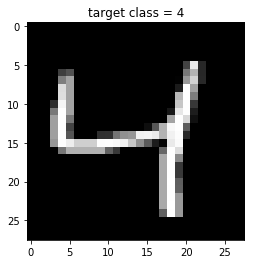

In [ ]:
import matplotlib.pyplot as plt
index = 2
plt.title('target class = ' + str(y_train[index]))
plt.imshow(X_train[index], cmap = 'gray')

### In order to demonstrate Nearest Neighbor efficiently, let's reduce the dataset size

In [ ]:
X_test = X_test[:200, :]
y_test = y_test[:200]

In [ ]:
import numpy as np

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Let's get the distnace function defined

In [ ]:
from math import sqrt

def euclidean_distance(img_a, img_b):
    '''Finds the distance between 2 images: img_a, img_b'''
    vec_a = np.reshape(img_a, -1)
    vec_b = np.reshape(img_b, -1)
    # element-wise computations are automatically handled by numpy
    return sqrt(sum((vec_a - vec_b) ** 2))

print(euclidean_distance(X_test[0], X_train[0]))
print(euclidean_distance(X_train[0], X_train[0]))

135.988970140964
0.0


### Try out Nearest Neighbor

In [ ]:
def nearest_neighbor(test_image, train_images, train_labels):
    # distances contains tuples of (distance, label)
    distances = [(euclidean_distance(test_image, image), label)
                 for (image, label) in zip(train_images, train_labels)]
    # sort the distances list by distances
    distances.sort(key = lambda x : x[0])

    return distances[0][1]

# Sanity check here using a training data point
print(nearest_neighbor(X_train[0], X_train, y_train))
print(y_train[0])

5
5


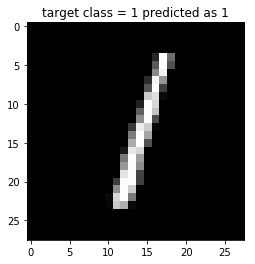

In [ ]:
import matplotlib.pyplot as plt
index = 2
pred = nearest_neighbor(X_test[index], X_train, y_train)
plt.title('target class = ' + str(y_test[index]) + ' predicted as ' + str(pred))
plt.imshow(X_test[index], cmap = 'gray')

In [ ]:
from tqdm import tqdm
pred = [nearest_neighbor(test_image, X_train, y_train) for test_image in tqdm(X_test)]
acc = sum(pred == y_test) / len(pred)
print(f'Accuracy of Nearest Neighbor = {acc * 100}%')

 41%|████      | 1018/2500 [12:25<20:09,  1.23it/s]

KeyboardInterrupt: 

### Try our K Nearest neighbors

In [ ]:
def k_nearest_neighbor(test_image, train_images, train_labels, k = 10):
    # distances contains tuples of (distance, label)
    distances = [(euclidean_distance(test_image, image), label)
                 for (image, label) in zip(train_images, train_labels)]
    # sort the distances list by distances
    distances.sort(key = lambda x : x[0])

    from collections import defaultdict
    counter = defaultdict(int)
    for (dist, label) in distances[:k]:
        counter[label] += 1
    ranks = list(counter.items())
    ranks.sort(key = lambda x : x[1], reverse = True)

    return ranks[0][0]

print(k_nearest_neighbor(X_test[0], X_train, y_train))
print(y_test[0])

In [ ]:
pred = [k_nearest_neighbor(test_image, X_train, y_train) for test_image in tqdm(X_test)]
acc = sum(pred == y_test) / len(pred)
print(f'Accuracy of KNN = {acc * 100}%')